In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import h5py
import plots

In [23]:
plt.subplots_adjust(left=0.08,
                    bottom=0.12, 
                    right=0.99, 
                    top=0.92, 
                    wspace=0.0,
                    hspace=0.25)

<Figure size 432x288 with 0 Axes>

/tmp/ipykernel_22949/1568904007.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


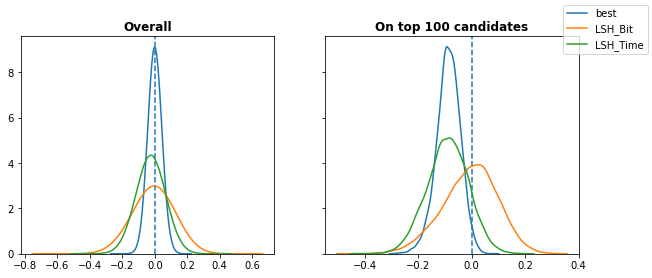

In [19]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, sharey = True, figsize=(10,4))
best = h5py.File(plots.d_prefix[0] + "_" + "mahalanobis_16_perm.hdf5", "r")
best_eip = np.array(best["estimated_inner"])#[:,:50000]
best_tip  =np.array(best["true_inner"])#[:,:50000]
plots.TOP = False
for ax in axes:
    plots.plot_err(best_eip, best_tip, ax, "best")
    ax.axvline(0.0, linestyle="--")
    for lsh in plots.lsh_types.keys():
        data_path = plots.d_prefix[0] + "_" + lsh
        hf = h5py.File(data_path, "r")
        estimates = plots.infer_estimates(np.array(hf["collision_prob"]))#[:,:5000]
        true = np.array(hf["true_inner"])#[:,:5000]
        plots.plot_err(estimates, true, ax, plots.lsh_types[lsh])

    plots.TOP = True

handles, labels = axes[0].get_legend_handles_labels()
axes[0].set_title("Overall", fontweight="semibold")
axes[1].set_title("On top 100 candidates", fontweight="semibold")
axes[0].set_xlim(-0.5, 0.5)
axes[1].set_xlim(-0.9, 0.1)

#fig.text(0.02, 0.5 ,"Density", va="center", rotation="vertical", fontsize=15)
#fig.text(0.52, 0.02 ,"Estimation Error", ha="center", fontsize=15)

fig.legend(handles, labels)
fig.show()


In [25]:
axes[0].set_xlim(-0.5, 0.5)
axes[1].set_xlim(-0.7, 0.3)

(-0.9, 0.1)

In [21]:
fig.show()

/tmp/ipykernel_22949/89474557.py:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


In [26]:
fig.savefig("../../plots/LSH_comp.svg", format="svg")